In [1]:
import torch
from torch import nn
from utils import load_data
import matplotlib.pyplot as plt
from fcn import FCN
from cnn import CNN
from sae import StackedAE
from train import trial, train
from metrics import compute_accuracy

In [2]:
train_input, train_target, train_classes, test_input, test_target, test_classes = load_data()

In [3]:
fcn = FCN(3)
sae = StackedAE(4)
cnn = CNN(3, K=3)

Width for 70000 parameters in a 3-layer FCN: 142
Parameters: 70016
Width for 70000 parameters in a 4-layer stacked AE: 61
SAE Parameters: 23983
Width for 70000 parameters in a 3-layer CNN: 34
Parameters: 69030


In [4]:
cnn

CNN(
  (conv): Sequential(
    (0): Conv2d(1, 34, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(34, 68, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(68, 68, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
  )
  (fc): Linear(in_features=612, out_features=10, bias=True)
)

In [5]:
tt1 = train_input[:10,0,:,:]

In [6]:
cnn(tt1, tt1)[0].shape

torch.Size([10, 10])

In [7]:
print([p.numel() for p in cnn.parameters()])

[306, 34, 20808, 68, 41616, 68, 6120, 10]


In [8]:
depth_losses = {'mean':[], 'std':[]}

In [9]:
import time

In [10]:
start = time.time()
train(cnn, train_input, train_target, train_classes, batch_size=100)
print(time.time()-start)

Epoch 1/25, Loss: 42.548, Accuracy: 0.744
Epoch 2/25, Loss: 27.176, Accuracy: 0.840
Epoch 3/25, Loss: 13.296, Accuracy: 0.887
Epoch 4/25, Loss: 8.969, Accuracy: 0.922
Epoch 5/25, Loss: 6.974, Accuracy: 0.932
Epoch 6/25, Loss: 5.675, Accuracy: 0.951
Epoch 7/25, Loss: 4.585, Accuracy: 0.948
Epoch 8/25, Loss: 3.992, Accuracy: 0.955
Epoch 9/25, Loss: 3.477, Accuracy: 0.970
Epoch 10/25, Loss: 3.130, Accuracy: 0.974
Epoch 11/25, Loss: 2.676, Accuracy: 0.980
Epoch 12/25, Loss: 2.370, Accuracy: 0.975
Epoch 13/25, Loss: 2.156, Accuracy: 0.979
Epoch 14/25, Loss: 1.930, Accuracy: 0.985
Epoch 15/25, Loss: 1.591, Accuracy: 0.984
Epoch 16/25, Loss: 1.357, Accuracy: 0.984
Epoch 17/25, Loss: 1.192, Accuracy: 0.987
Epoch 18/25, Loss: 1.090, Accuracy: 0.984
Epoch 19/25, Loss: 1.009, Accuracy: 0.984
Epoch 20/25, Loss: 0.932, Accuracy: 0.991
Epoch 21/25, Loss: 0.898, Accuracy: 0.995
Epoch 22/25, Loss: 0.938, Accuracy: 0.997
Epoch 23/25, Loss: 1.053, Accuracy: 0.993
Epoch 24/25, Loss: 1.060, Accuracy: 0.99

In [6]:
depth_losses = {'mean':[], 'std':[]}
depth_tr_acc = {'mean':[], 'std':[]}
depth_te_acc = {'mean':[], 'std':[]}

for depth in range(2,4,2):
    cnn = CNN(depth)
    #sae.pretrain(train_input)
    tr_loss, tr_acc, te_acc = trial(cnn, train_input, train_classes, train_target, test_input, test_target)
    
    depth_losses['mean'].append(tr_loss.mean(0))
    depth_losses['std'].append(tr_loss.std(0))
    depth_tr_acc['mean'].append(tr_acc.mean(0))
    depth_tr_acc['std'].append(tr_acc.std(0))
    depth_te_acc['mean'].append(te_acc.mean(0))
    depth_te_acc['std'].append(te_acc.std(0))

Width for 70000 parameters in a 2-layer CNN: 52
Parameters: 69534
Trial 1/10...


KeyboardInterrupt: 

In [ ]:
fig = plt.gcf()

for i, depth in enumerate(range(2,12,2)):
    plt.errorbar(range(25), depth_losses['mean'][i].numpy().T, depth_losses['std'][i].numpy().T, fmt = '.', label=f'depth {depth}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
fig.savefig('CNN_loss.png')

In [ ]:
fig = plt.figure(figsize=(7,6))
for i, depth in enumerate(range(2,12,2)):
    plt.errorbar(range(25), depth_tr_acc['mean'][i].numpy().T, depth_tr_acc['std'][i].numpy().T, fmt = '.', label=f'depth {depth}')
plt.xlabel('Epoch')
plt.ylabel('Train accuracy')
plt.legend(loc='best')
plt.ylim((0.4, 1.02))
plt.show()
fig.savefig('CNN_acc.png')

In [ ]:
fig = plt.gcf()
plt.bar(range(2,12,2), depth_te_acc['mean'], color="w", yerr=depth_te_acc['std'], ecolor='k', edgecolor='k', hatch='/')
plt.xlabel('Depth')
plt.ylabel('Test accuracy')

for i, value in enumerate(range(2,12,2)):
    plt.text(value, depth_te_acc['mean'][i]+0.01, str(round(depth_te_acc['mean'][i].item(), 3)))

plt.xlim((1,11))
plt.tight_layout()
fig.savefig('CNN_test.png')

In [74]:
tr_mean_loss = tr_loss.mean(0)
tr_std_loss = tr_loss.std(0)
tr_mean_acc = tr_acc.mean(0)
tr_std_acc = tr_acc.std(0)
te_mean_acc = te_acc.mean(0)
te_std_acc = te_acc.std(0)
xl = range(25)
xa = range(25)

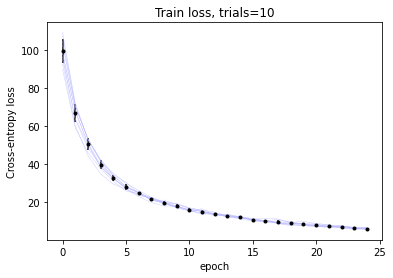

In [75]:
plt.errorbar(xl, tr_mean_loss, tr_std_loss, fmt='.k')
plt.plot(x, tr_loss.numpy().T, 'k', linestyle="-",color=([0.7, 0.7, 1]),label='loss',linewidth=0.3)
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.title(f'Train loss, trials=10')
plt.show()

In [86]:
tr_acc[-1]

tensor([0.7060, 0.7820, 0.8450, 0.8780, 0.9050, 0.9220, 0.9280, 0.9410, 0.9500,
        0.9610, 0.9640, 0.9640, 0.9750, 0.9800, 0.9770, 0.9780, 0.9800, 0.9850,
        0.9870, 0.9920, 0.9940, 0.9930, 0.9930, 0.9940, 0.9940])

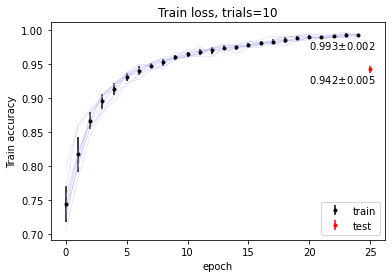

In [113]:
plt.errorbar(xa, tr_mean_acc, tr_std_acc, fmt='.k', label='train')
plt.plot(xa, tr_acc.numpy().T,'k', linestyle="-",color=([0.7, 0.7, 1]),linewidth=0.3)
plt.annotate(repr(round(tr_mean_acc[-1].item(), 3)) + '$\pm$' + repr(round(tr_std_acc[-1].item(),3)), (20, tr_mean_acc[-1]-0.02))
plt.errorbar(25, te_mean_acc, te_std_acc, fmt='.r', label='test')
plt.annotate(repr(round(te_mean_acc.item(), 3)) + '$\pm$' + repr(round(te_std_acc.item(),3)), (20, te_mean_acc-0.02))
plt.xlabel("epoch")
plt.ylabel("Train accuracy")
plt.title(f'Train loss, trials=10')
plt.legend(loc='lower right')
plt.show()

(25,)
(25,)


ValueError: The lengths of the data (25) and the error 1 do not match

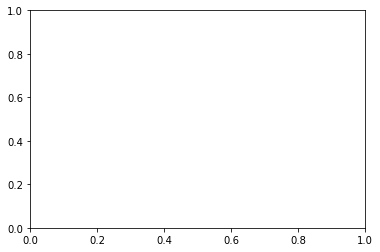

In [49]:
plt.errorbar(x, tr_mean_loss, tr_std_loss, 'r', linestyle="-",label='mean_loss',linewidth=3)
#plt.plot(x,tr_loss.numpy().T,'r',linestyle="-",color=([0.8, 0.8, 1]),label='loss',linewidth=0.3)


In [8]:
a = [[1, 2, 3], [4, 5, 6]]

In [9]:
aa = torch.Tensor(a)

In [10]:
aa

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [11]:
aa.shape

torch.Size([2, 3])